# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `KNN Classifiers`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed 
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q1.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Siddik Ayyappa Naraharisetti<br>
Roll Number: 2020101089 <br>

### Dataset

Use the code below to load the Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#Load data
iris = pd.read_csv('Iris.csv')
#data cleaning
iris.drop(columns="Id",inplace=True)

In [3]:
#features and labels
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Write your Code below for KNN Classifier.<br>
Use different values of K and test the accuracies.

### Beginning the code
We shall visualise the dataset with the help of pandas dataframes, to get a feel of how the data is.

In [4]:
pd.DataFrame(X_train)

,0,1,2,3
0,6.4,3.1,5.5,1.8
1,5.4,3.0,4.5,1.5
2,5.2,3.5,1.5,0.2
3,6.1,3.0,4.9,1.8
4,6.4,2.8,5.6,2.2
...,...,...,...,...
115,4.9,3.1,1.5,0.1
116,6.3,2.9,5.6,1.8
117,5.8,2.7,4.1,1.0
118,7.7,3.8,6.7,2.2


In [5]:
pd.DataFrame(y_train)


,0
0,Iris-virginica
1,Iris-versicolor
2,Iris-setosa
3,Iris-virginica
4,Iris-virginica
...,...
115,Iris-setosa
116,Iris-virginica
117,Iris-versicolor
118,Iris-virginica


In [6]:
import statistics as stat

class KNN():
    def __init__(self, x_train, y_train, k):
        self.X = x_train
        self.y, self.y_key_forward, self.y_key_back = self.to_categorical(y_train)
        self.y_train = y_train
        self.k = k
    def to_categorical(self, y):
        y = np.array(y)
        cat = np.unique(y)
        n_cat = len(cat)
        temp = dict()
        temp_1 = dict()
        for i in range(n_cat):
            temp[cat[i]] = i
            temp_1[i] = cat[i]
        del cat
        cat_labels = [temp[i] for i in y]
        return cat_labels, temp,temp_1
    def neighbours(self, sample):
        min_distance, dist = np.inf, []
        for idx, i in enumerate(self.X): # -> Time complexity - nd
            dist += [(np.sum((sample - i)**2), idx)] 
        dist.sort(key=lambda pair:pair[0]) # sorting with the distance. Time complexity - n.log n
        dist = np.array(np.array(dist))[:self.k]
        labels = [self.y[int(i[1])] for i in dist]   # getting the labels of the nearest k points
        return labels
    def forward(self, X):
        neighbours = []
        for i in X:
            neighbours += [self.neighbours(i)] # -> This would be repeating n times. time complexity for each time - nd + n.log(n)
            # Hence the total time complexity - O(n(nd + n.log(n)))
        labels = []
        for neighbour in neighbours:
            labels += [stat.mode(neighbour)] # this is the only line in which a third party library has been utilised, just for the mode of the array.
            # The above line is run for n times, each, looking for the mode in an array of size k -
            #  time complexity - O(nk)
        labels = np.array(labels)
        return labels
    def evaluate(self, X, y):
        labels = self.forward(X) # total time complexity - O(n(nd + n.log(n) + k))
        if(len(labels) != len(y)):
            raise ValueError("Check Labels")
        y_labels = [self.y_key_forward[i] for i in y]
        score = 0
        array = ["=","=","=","=","=","=","=","=","=",">"]
        for i in range(len(y_labels)):
            if(y_labels[i] == labels[i]):
                score += 1
        return(score/len(y)*100)

###  Math behind the code

All the points in the initial set $X_{init}$ are firstly taken in the class. Then for each point $X_i$ in the test for which we calculate the label, we calculate the distance,
<br> 
$(X_i - X_j)^2$  $\forall X_j \in X_{init}$ 
<br> 
<br> 
Which will ne stored in an array. Then we sort the array, take the first k points (neighbours), then we assign the major label in the k neighbours. 

In [7]:
accuracies = []
for k in range(1, 110):
    knn = KNN(X_train, y_train, k = k) # initialising the dataset, 
    accuracies += [knn.evaluate(X_test, y_test)]

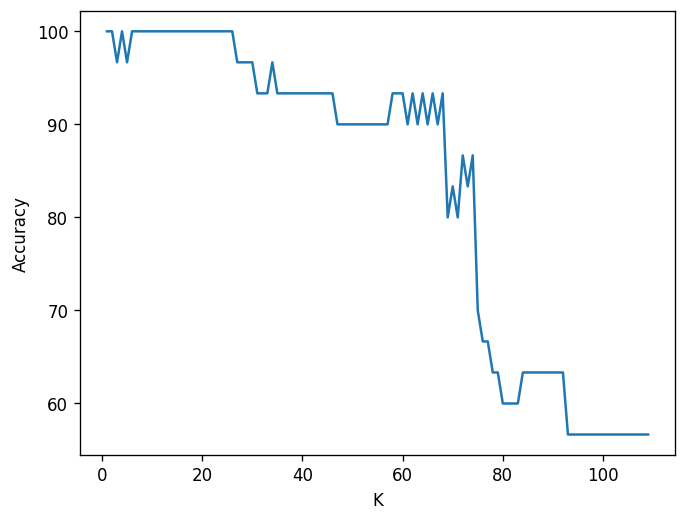

In [76]:
import matplotlib.pyplot as plot
plot.figure(dpi=120)
plot.plot(range(1, len(accuracies)+1), accuracies)
# plot.xticks(range(0, len(accuracies), 8))
# plot.yticks(range(0, len(accuracies), 8))
plot.xlabel("K")
plot.ylabel("Accuracy")
plot.show()

### Questions

1) What are the Advantages and Disadvantages of KNN algorithm?
   <br>
   | Advantages | Disadvantages |
   | --- | --- |
   | The time complexity of training is <br>practically 0 | The time complexity of testing suggests that<br> for large dataset (or data with high number of <br>features) it is not feasible to use KNN|
   | Easy to add new data | Noisy data influences the final labels |
   | Easy to implement | The data must be normalized among all the features <br>individually (Data of similar nature could be recorded in <br>different units) else the accuracies are affected.| 
   
   <br>
2) What is the complexity of the KNN algorithm during Training and Testing?<br><br> 
   1) The answers are given assuming the values of k, n, d, being the number of neigbours, number of training samples and the number of features respectively.
   2) The <b>training</b> phase, doesn't have much of computation to do (We are just storing the training data), hence 
      1) The time complexity - ```O(1)```
      2) The space complexity - ```O(nd)```
   3) The <b>testing</b> phase
      1) The time complexity - ```O(n(nd + n.log(n) + k))```
      2) The space complexity - ```O(nk)```
<br><br>
3) Is euclidian distance the only distance metric used in KNN?
   <br><br>
   No. Depending upon the space which the points are in and the problem being solved, we can use different metrics, like Minkowski, Chi-Squared, Cosine. [source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4978658/)
   <br><br>
4) what K value gave the best accuracy?<br><br>
   The values like 1, 5, 6, 11, .. 29, have been giving an accuracy of $100\%$


### Testing and Verification

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc = []
for i in range(1, 110):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    temp = model.predict(X_test)
    acc += [(accuracy_score(temp, y_test))*100]

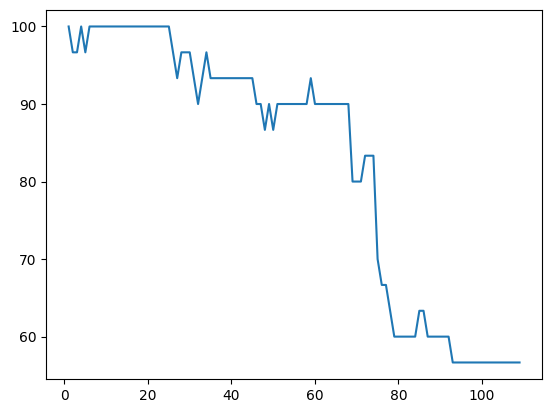

In [78]:
plot.plot(range(1, len(acc)+1), acc)
plot.show()

The above plot, which has been taken from the actual classification, shows resemlence with the plot featuring in the above portions of the notebook, implying that the classification is indeed accurate. 